<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V8a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## gerald.schuller@tu-ilmenau.de

#**Digital Filters, Transmission, Modulation**

How is the image or video transferred from the transmitter to the receiver?

####Transmitter:
Transmitter transmits on certain carrier frequency Frequency, e. g. UHF, channel 21 approx. 480 MHz (1 Hertz (Hz) = 1 oscillation
Per second, MHz= 1 million Hz)

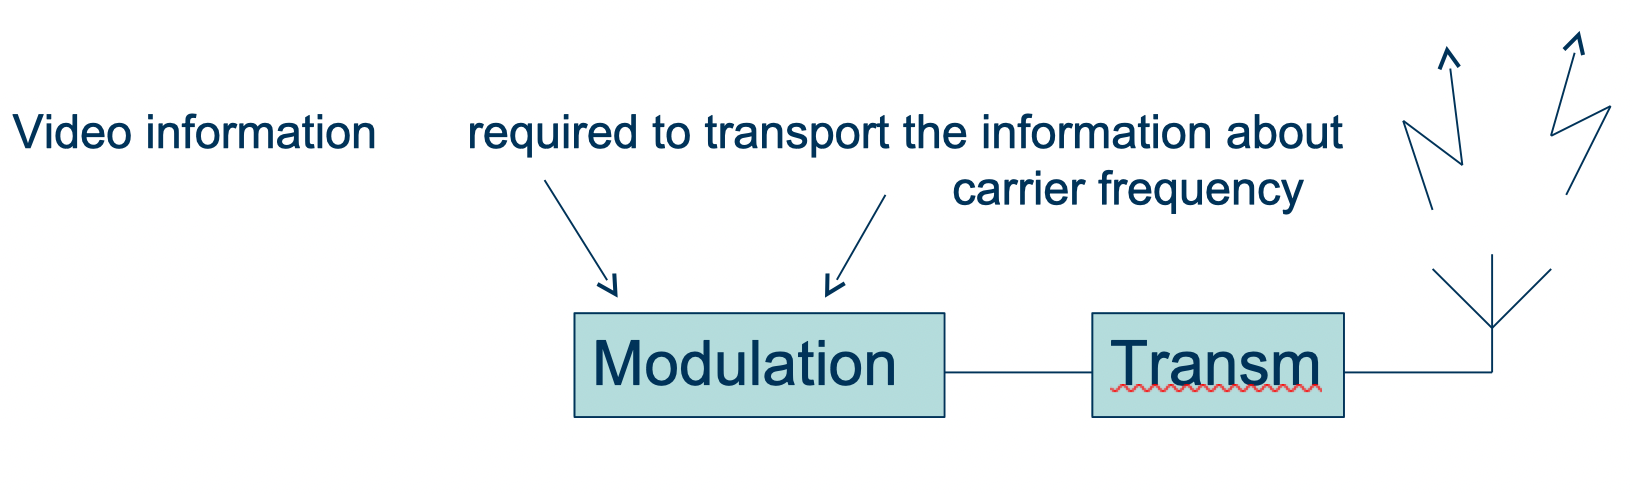

Why Modulation?

$C=λ⋅f$	
→	by 5 MHz Video frequency (PAL)
			     wave length: 60m

   → antenna size: 15-60m

How is the image or video transferred from the transmitter to the receiver?

####Receiver:	

Filters leave out certain carrier frequencies to select program

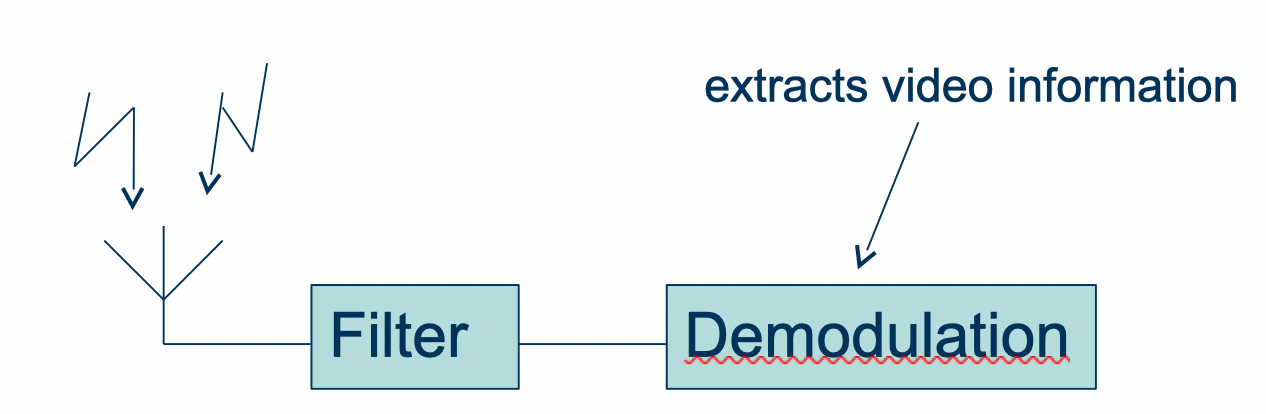

###Filter of the receiver:
Receive filters for high frequencies, such as in television, are analog. Analogue filters with good attenuation (suppression of adjacent transmitters), which are adjustable at the same time are technically difficult to implement.

Problem with switching programs.
   -  We need a technical trick that solves this problem with fixed filters.

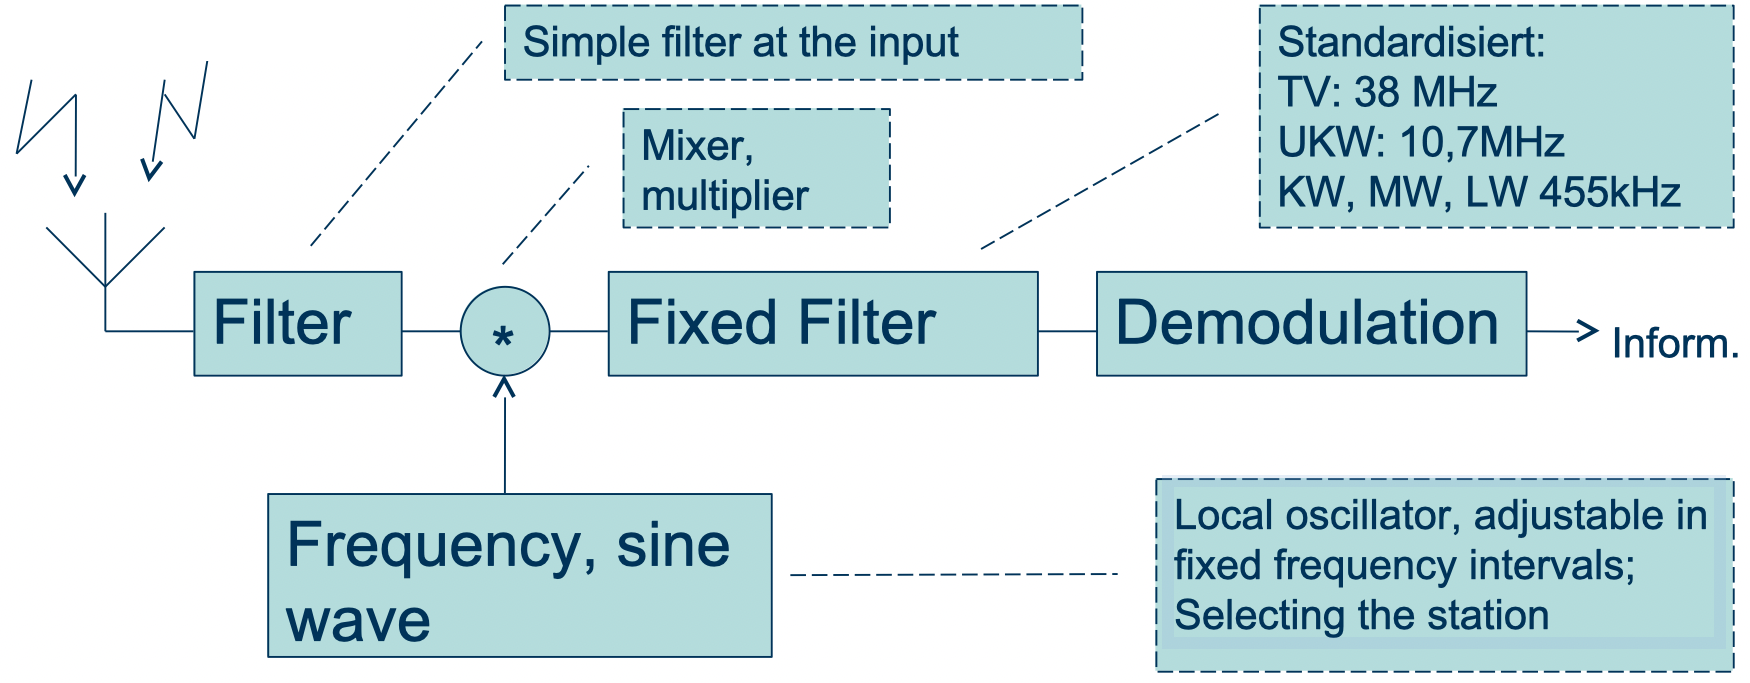

For the superheterodyne receiver principle, see also: 
https://en.wikipedia.org/wiki/Superheterodyne_receiver

Example of an oscillator that generates a sine wave of adjustable frequency ("Clapp oscillator"):

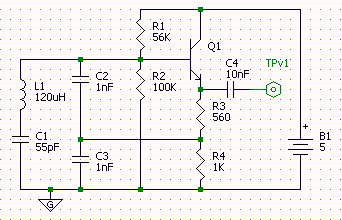

From: http://de.wikipedia.org/wiki/Clapp-Schaltung

What happens when mixing?

Carrier signal $sin(ω_Tt)$, with angular freq. $ω_T=2πf_T$,

Local Oscillator Signal: $sin(ω_{LO}t)$ with angular freq. $ω_{LO}=2πf_{LO}$, these frequencies are multiplied during mixing:

$$sin(ω_Tt)sin(ω_{LO}t)=?$$
	
For a reformulation we use the Euler formula (for more detailed information: https://en.wikipedia.org/wiki/Euler%27s_formula), according to which the sine is the imaginary part of the exponential function:

$$sin(ωt)=ℑ(e^{jωt})=\frac{1}{2j}(e^{jωt}-e^{-jωt})$$
   

Hence:

\begin{align*}
 sin(ω_Tt)sin(ω_{LO}t) &= (\frac{1}{2j}(e^{jω_Tt}-e^{-jω_Tt})⋅\frac{1}{2j}(e^{jω_{LO}t}-e^{-jω_{LO}t}) \\
      &= \frac{-1}{4}(e^{j(ω_T+ω_{LO})t}+e^{-j(ω_T+ω_{LO})t}) \\
      &=\frac{-1}{2}cos((ω_T+ω_{LO})t)+\frac{1}{2}((ω_T-ω_{LO})t)
\end{align*}

We see: One cos component is created with the **sum** of the two frequencies, and one with the **difference**!

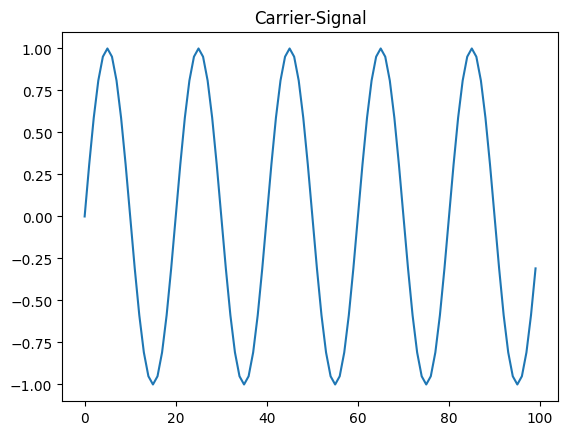

In [7]:
import numpy as np
import matplotlib.pylab as plt

#Carrier-Signal:
shf=np.sin(np.pi*10*np.arange(1,2,0.01)) 
plt.title("Carrier-Signal")
plt.plot(shf)

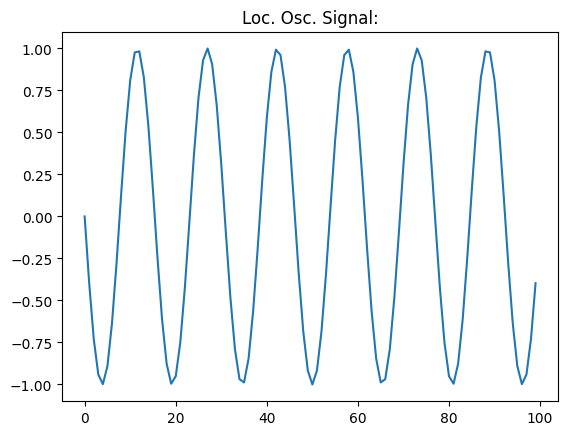

In [9]:
#Loc. Osc. Signal:
slo=np.sin(np.pi*13*np.arange(1,2,0.01)); 
plt.title("Loc. Osc. Signal:")
plt.plot(slo)

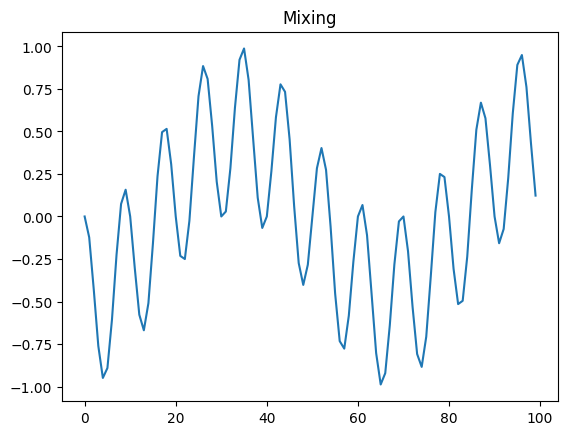

In [10]:
#Mixing
szf=shf*slo;
plt.title("Mixing")
plt.plot(szf)

##**Mixing creates new frequencies:**
→ Difference frequency $ω_T-ω_{LO}$

→ Sum frequency $ω_T+ω_{LO}$

Application: Filter tuned to fixed difference frequency $ω_T-ω_{LO}$

By varying the oscillator frequency $ω_{LO}$, the different transmitter frequencies $ω_T$ can be passed in this way.

→ A fixed filter is sufficient to separate all transmitters (applies to both, analog and digital transmission)

Illustration of the filtering of the difference frequency,
also called "intermediate frequency" 

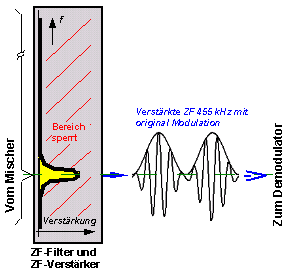

http://de.wikipedia.org/wiki/%C3%9Cberlagerungsempf%C3%A4nger

**Example:**

Frequency from the satellite is at approx. 10 GHz, too high for common antenna cables (too much attenuation). Therefore, already at the receiver at the dish (LNB) there is a conversion to a lower frequency for the cable, using to this mixing principle. 

(LNB: Low Noise Block Converter, conversion to
approx. 1-2 GHz)

**Note**: Satellites with 10 GHz transmission frequency have a much higher frequency than UHF for terrestrial broadcasting, so it is much easier to transmit more channels. The relative bandwidth of a channel to the carrier frequency decreases. Therefore, it is easy to transmit several dozen or more programs.

Not practical for terrestrial distribution, because line-of-sight to the transmitter is required. High frequencies are similar to light in their propagation properties!

**Note**: According to this receiver principle, there are 2 frequencies that we can receive. Firstly, the filter frequency (called intermediate frequency) below the frequency of the local oscillator (the usual one) and also the frequency that is above the frequency of the local oscillator by the intermediate frequency. The latter is usually undesirable, and must be attenuated by an input filter.

The magnitude of this attenuation is called "mirror frequency suppression". This is important information in data sheets for receivers. The bigger the attenuation, the better.

#**Python Example: Mixing a speech signal.**
We mix (multiply or modulate) the signal from the microphone with a sine wave tone at a frequency of 500 Hz. This mixture results in the sum and difference frequencies, i. e., the sum and difference frequencies:

- 500 Hz +/- Speech frequencies

The speech spectrum most noticable is pushed up in frequency by 500 Hz, and that sounds like a Mickey Mouse-like voice. We use the library "pyaudio".

Execute it in a Linux terminal shell with:

*python pyrecplay_modulationblock.py*

This shows that we can shift a signal to a different frequency. 
(you might neet sudo apt install python-pyaudio)

